In [2]:
import numpy as np
import pandas as pd
from IPython.display import display #display for data frames

%matplotlib inline

df = pd.read_csv("titanic_data.csv")  

In [3]:
display(df.head())

,"PassengerId;""Survived"";""Pclass"";""Name"";""Sex"";""Age"";""SibSp"";""Parch"";""Ticket"";""Fare"";""Cabin"";""Embarked"""
"1;0;3;""Braund","Mr. Owen Harris"";""male"";22;1;0;""A/5 21171"";7...."
"2;1;1;""Cumings","Mrs. John Bradley (Florence Briggs Thayer)"";""..."
"3;1;3;""Heikkinen","Miss. Laina"";""female"";26;0;0;""STON/O2. 310128..."
"4;1;1;""Futrelle","Mrs. Jacques Heath (Lily May Peel)"";""female"";..."
"5;0;3;""Allen","Mr. William Henry"";""male"";35;0;0;""373450"";8.0..."


In [3]:
# remove survived from data

df.columns.tolist()


['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
outcomes = df['Survived']
data = df.drop('Survived', axis = 1)
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# accuracy score function
def accuracy(par1, par2):
    if len(par1)==len(par2):
        return f"Accuracy is {(par1).mean()*100}"
    else:
        return "Number of predictions does not match the outcome"
    
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy(outcomes[:5], predictions))

Accuracy is 60.0


In [25]:
def accuracy(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy(outcomes[:5], predictions))
    

Predictions have an accuracy of 60.00%.


In [33]:
# How accurate would a prediction be that none of the passangers survived?

def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)
print(accuracy(outcomes, predictions))

Predictions have an accuracy of 61.62%.


In [36]:
def predictions_1(data):
    
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex'] =='female':
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)
predictions = predictions_1(data)
print(accuracy(outcomes, predictions))

Predictions have an accuracy of 78.68%.


In [20]:
# How accurate would a prediction be that all female passengers 
#survived and remaining did not?
print(accuracy(outcomes, predictions))

Number of predictions does not match the outcome


In [37]:
def predictions_2(data):
    
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex'] =='female':
            predictions.append(1)
        elif passenger['Sex']=='male' and passenger['Age']<= 10:
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions)
predictions = predictions_1(data)
print(accuracy(outcomes, predictions))

Predictions have an accuracy of 78.68%.


In [58]:
def predictions_3(data):
    
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex'] =='female' and passenger['Parch']>0 or passenger['Age'] < 10 or passenger['Pclass'] <= 2:
            predictions.append(1)       
        else:
            predictions.append(0)
    return pd.Series(predictions)
predictions = predictions_1(data)
print(accuracy(outcomes, predictions))

Predictions have an accuracy of 78.68%.


In [50]:
import seaborn as sns
df['Survived'] = df['Survived'].astype(int)
df['Pclass'] = df['Pclass'].astype(int)

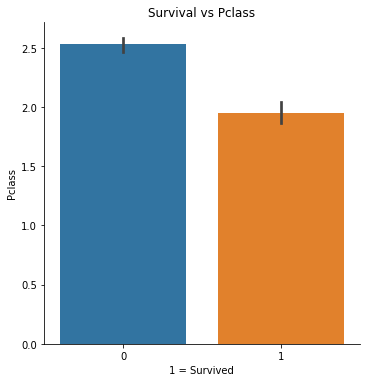

In [53]:
sns.catplot(x='Survived', y='Pclass', kind = 'bar', data=df)
plt.xlabel('1 = Survived')
plt.ylabel('Pclass')
plt.title('Survival vs Pclass')
plt.show()

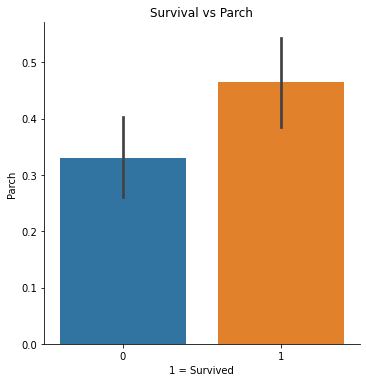

In [57]:
sns.catplot(x='Survived', y='Parch', kind = 'bar', data=df)
plt.xlabel('1 = Survived')
plt.ylabel('Parch')
plt.title('Survival vs Parch')
plt.show()

In [ ]:
# Think of a real-world scenario where supervised learning could be applied. 
# What would be the outcome variable that you are trying to predict? 
# Name two features about the data used in this scenario that might be helpful for making the predictions.

# Predicting house prices on the market. The outcome variables are the prices.
# House size and location are the two variables that will be helpful in prediction.